# Meu primeiro projeto de Machine Learning
1. Carregar conjunto de dados
2. Análise exploratória dos dados
3. Pré-processamento dos dados
  * 3.1 Separar atributos e alvo
  * 3.2 Dividir dados de treino e teste
4. Criar modelo de Regresssão Linear
5. Criar modelo de Árvore de Decisão
6. Comparar modelos
7. Visualizar dados

# Carregar conjunto de dados

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv("FuelConsumptionRatings2023.csv", encoding="latin1")
df.head()

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36.0,181.0,6.0,6.0
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6.0,AS10,Z,13.8,11.2,12.4,23.0,291.0,4.0,5.0


In [14]:
df.shape

(856, 15)

In [15]:
df.describe()

,Engine Size (L),Cylinders,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
count,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,3.147899,5.627851,12.431453,9.353661,11.047179,27.375750,257.471789,4.522209,5.236495
std,1.353076,1.968695,3.456191,2.302312,2.878308,7.559968,64.262847,1.279385,1.665693
min,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2.000000,4.000000,10.100000,7.700000,9.000000,22.000000,211.000000,4.000000,5.000000
50%,3.000000,6.000000,12.100000,9.100000,10.700000,26.000000,254.000000,5.000000,5.000000
75%,3.600000,6.000000,14.600000,10.700000,12.900000,31.000000,299.000000,5.000000,7.000000
max,8.000000,16.000000,30.300000,20.900000,26.100000,64.000000,608.000000,9.000000,8.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        841 non-null    object 
 1   Make                        854 non-null    object 
 2   Model                       833 non-null    object 
 3   Vehicle Class               833 non-null    object 
 4   Engine Size (L)             833 non-null    float64
 5   Cylinders                   833 non-null    float64
 6   Transmission                833 non-null    object 
 7   Fuel Type                   833 non-null    object 
 8   Fuel Consumption (L/100Km)  833 non-null    float64
 9   Hwy (L/100 km)              833 non-null    float64
 10  Comb (L/100 km)             833 non-null    float64
 11  Comb (mpg)                  833 non-null    float64
 12  CO2 Emissions (g/km)        833 non-null    float64
 13  CO2 Rating                  833 non

# Pré-processamento dos dados

In [17]:
df.isnull().sum()

,0
Year,15
Make,2
Model,23
Vehicle Class,23
Engine Size (L),23
Cylinders,23
Transmission,23
Fuel Type,23
Fuel Consumption (L/100Km),23
Hwy (L/100 km),23


In [18]:
# manipulando valores em falta
df.dropna(inplace=True)

In [19]:
# removendo atributos irrelevantes
df = df.drop(['Transmission', 'Make', 'Year', 'Vehicle Class', 'Model'], axis=1)

In [20]:
# converter atributo categórico (texto para número)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Fuel Type']

for column in categorical_columns:
  df[column] = label_encoder.fit_transform(df[column])

In [21]:
df.head()

,Engine Size (L),Cylinders,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,1.5,4.0,3,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,1.5,4.0,3,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,1.5,4.0,3,8.9,6.5,7.8,36.0,181.0,6.0,6.0
3,3.5,6.0,3,12.6,9.4,11.2,25.0,263.0,4.0,5.0
4,3.0,6.0,3,13.8,11.2,12.4,23.0,291.0,4.0,5.0


## Separar atributos (X) de alvo (y)

In [23]:
X = df.drop(['CO2 Emissions (g/km)'], axis=1)
y = df['CO2 Emissions (g/km)']

## Dividir dados de treino e teste

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regressão linear

# Criando o modelo

In [25]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print ('Coefficients: ', model.coef_)

Coefficients:  [ -1.22705446   3.2359807    2.7529431    6.18276824   7.57772925
  -1.86366627   0.34853404 -22.44484517  -1.38354015]


In [27]:
y_pred_lr_train = lr_model.predict(X_train)
y_pred_lr_test = lr_model.predict(X_test)
y_pred_lr_test

array([238.32014096, 225.42582136, 286.64075424, 281.71352656,
       238.9663439 , 182.96098085, 221.77339583, 288.20465056,
       320.99961386, 148.8647342 , 194.31093228, 216.29077022,
       229.75088463, 181.04037504, 221.42379488, 256.50385929,
       225.71823545, 295.43348378, 229.6664758 , 243.65484407,
       114.67750599, 332.57989696, 325.82883014, 183.65371176,
       298.02650911, 226.5490682 , 327.89297444, 341.97702687,
       254.44225284, 234.70699213, 194.86116536, 273.65511324,
       221.5982377 , 180.01945772, 228.62259845, 267.93598948,
       188.09204755, 286.96190607, 225.17152036, 221.15511901,
       190.54136806, 236.61517148, 346.31806833, 330.38422296,
       294.91037964, 221.15511901, 189.95823688, 341.62668415,
       342.7387225 , 326.72016767, 226.26196539, 216.87541019,
       236.38887787, 272.71226724, 191.39040658, 194.16592431,
       392.49509046, 288.81829545, 229.37391248, 229.19564878,
       226.95413461, 149.53724922, 275.33040911, 230.45

## Avaliando o desempenho do modelo

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_pred_lr_train)
lr_train_r2 = r2_score(y_train, y_pred_lr_train)

lr_test_mse = mean_squared_error(y_test, y_pred_lr_test)
lr_test_r2 = r2_score(y_test, y_pred_lr_test)

### O coeficiente de determinação, também chamado de R², é uma medida de ajuste de um modelo estatístico linear generalizado, como a regressão linear simples ou múltipla, aos valores observados de uma variável aleatória. O R² varia entre 0 e 1, por vezes sendo expresso em termos percentuais. Nesse caso, expressa a quantidade da variância dos dados que é explicada pelo modelo linear. Assim, quanto maior o R², mais explicativo é o modelo linear, ou seja, melhor ele se ajusta à amostra. Por exemplo, um R² = 0,8234 significa que o modelo linear explica 82,34% da variância da variável dependente a partir do regressores (variáveis independentes) incluídas naquele modelo linear.

In [30]:
print(f"LR MSE train error", lr_train_mse)
print(f"LR R2 train error", lr_train_r2)
print(f"LR MSE test error", lr_test_mse)
print(f"LR R2 test error", lr_test_r2)

LR MSE train error 151.99860599728189
LR R2 train error 0.9647112686486837
LR MSE test error 90.24356845252552
LR R2 test error 0.9726736075648713


In [31]:
lr_results = pd.DataFrame(["Linear Regression", lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]

In [32]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,151.998606,0.964711,90.243568,0.972674


# Árvore de decisão

## Criando o modelo

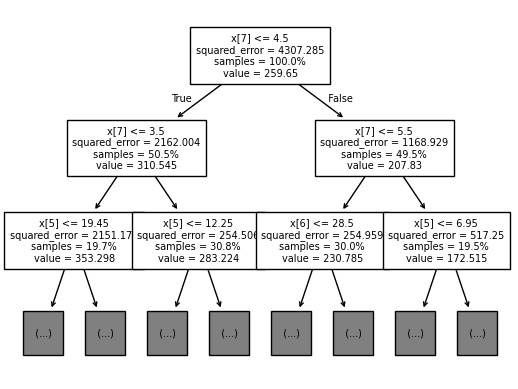

In [60]:
from sklearn import tree
from matplotlib import pyplot as plt
tree_model = tree.DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree.plot_tree(tree_model, proportion=True, max_depth=2, fontsize=7)
plt.show()

## Fazendo predições

In [39]:
y_pred_tree_train = tree_model.predict(X_train)
y_pred_tree_test = tree_model.predict(X_test)
y_pred_tree_test

array([239., 231., 247., 284., 249., 186., 227., 296., 329., 140., 189.,
       205., 238., 181., 208., 272., 232., 313., 224., 254., 111., 325.,
       327., 183., 307., 222., 323., 343., 265., 235., 198., 281., 219.,
       178., 223., 261., 188., 286., 211., 220., 195., 231., 339., 327.,
       299., 220., 198., 346., 345., 326., 221., 211., 237., 273., 194.,
       190., 388., 286., 234., 233., 218., 152., 275., 220., 298., 352.,
       174., 275., 232., 180., 389., 268., 320., 331., 200., 133., 272.,
       217., 224., 224., 167., 253., 229., 327., 242., 194., 281., 383.,
       195., 242., 195., 285., 160., 415., 277., 207., 307., 262., 262.,
       231., 208., 209., 200., 252., 229., 226., 232., 331., 207., 239.,
       220., 180., 374., 223., 157., 279., 343., 193., 299., 203., 284.,
       203., 307., 323., 269., 185., 289., 207., 251., 364., 167., 327.,
       203., 207., 111., 288., 265., 206., 218., 286., 248., 245., 252.,
       237., 216., 216., 297., 277., 276., 274., 23

## Avaliando o modelo

In [40]:
tree_train_mse = mean_squared_error(y_train, y_pred_tree_train)
tree_train_r2 = r2_score(y_train, y_pred_tree_train)

tree_test_mse = mean_squared_error(y_test, y_pred_tree_test)
tree_test_r2 = r2_score(y_test, y_pred_tree_test)

In [44]:
tree_results = pd.DataFrame(["AD Regression", tree_train_mse, tree_train_r2, tree_test_mse, tree_test_r2]).transpose()
tree_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]

In [42]:
tree_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.013514,0.999997,7.497006,0.99773



# Comparando Modelos

In [45]:
df_models = pd.concat([lr_results, tree_results])
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,151.998606,0.964711,90.243568,0.972674
0,AD Regression,0.013514,0.999997,7.497006,0.99773


# Visualizar dados do modelo

Text(0.5, 1.0, 'Linear Regression Model')

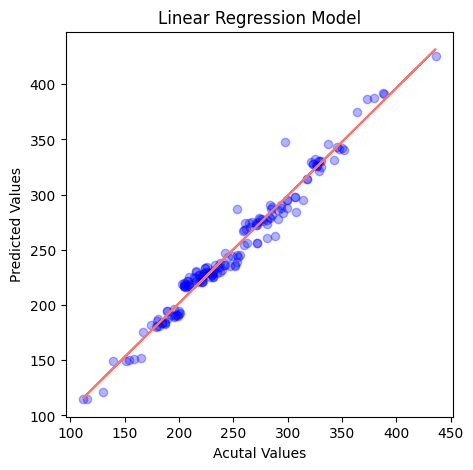

In [55]:
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_lr_test, color='b', alpha=0.3)

z = np.polyfit(y_test, y_pred_lr_test, 1)
p = np.poly1d(z)

plt.plot(y_test, p(y_test), '#F8766D')
plt.ylabel("Predicted Values")
plt.xlabel("Acutal Values")
plt.title("Linear Regression Model")

Text(0.5, 1.0, 'Decision Tree Model')

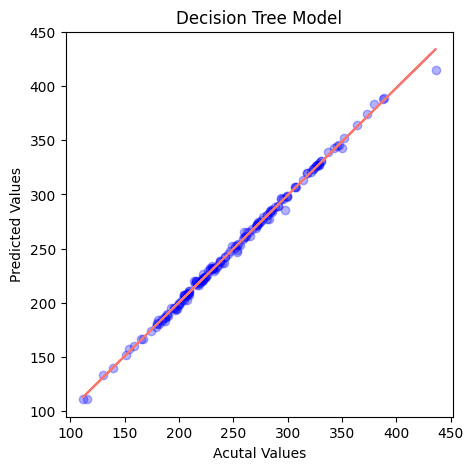

In [56]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_tree_test, color='b', alpha=0.3)

z = np.polyfit(y_test, y_pred_tree_test, 1)
p = np.poly1d(z)

plt.plot(y_test, p(y_test), '#F8766D')
plt.ylabel("Predicted Values")
plt.xlabel("Acutal Values")
plt.title("Decision Tree Model")